In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

In [20]:
# Define the confusion matrix data as a numpy array
data = np.array([
    [ 20, 0, 0, 0, 1, 0, 0, 0],
    [ 1, 14, 1, 0, 1, 0, 0, 1],
    [ 1, 2, 4, 1, 5, 0, 2, 1],
    [ 1, 0, 6, 12, 2, 0, 1, 0],
    [ 3, 0, 3, 0, 12, 0, 1, 0],
    [ 0, 0, 1, 0, 6, 0, 0, 0],
    [ 2, 1, 0, 0, 5, 0, 2, 3],
    [ 0, 0, 2, 0, 1, 0, 0, 17]
])

# Labels for rows and columns
labels = ["PiAb", "PoBa", "FrEx", "AlIn", "QuRo", "AcPs", "AlGl", "SaAl"]

# Create DataFrame
cf_matrix = pd.DataFrame(data, index=labels, columns=labels)

print(cf_matrix)

      PiAb  PoBa  FrEx  AlIn  QuRo  AcPs  AlGl  SaAl
PiAb    20     0     0     0     1     0     0     0
PoBa     1    14     1     0     1     0     0     1
FrEx     1     2     4     1     5     0     2     1
AlIn     1     0     6    12     2     0     1     0
QuRo     3     0     3     0    12     0     1     0
AcPs     0     0     1     0     6     0     0     0
AlGl     2     1     0     0     5     0     2     3
SaAl     0     0     2     0     1     0     0    17


In [35]:
# Overall accuracy
overall_accuracy = np.trace(cf_matrix) / np.sum(cf_matrix.values)

# Producers accuracy (Precision)
producers_accuracy = np.diag(cf_matrix) / np.sum(cf_matrix, axis=0)

# Users accuracy (Recall)
users_accuracy = np.diag(cf_matrix) / np.sum(cf_matrix, axis=1)

# Cohen's Kappa
flat_true = cf_matrix.sum(axis=1).values
flat_pred = cf_matrix.sum(axis=0).values
kappa = cohen_kappa_score(flat_true, flat_pred)


print(overall_accuracy)
print(producers_accuracy)
print(users_accuracy)
print(kappa)

0.5955882352941176
PiAb    0.714286
PoBa    0.823529
FrEx    0.235294
AlIn    0.923077
QuRo    0.363636
AcPs         NaN
AlGl    0.333333
SaAl    0.772727
dtype: float64
PiAb    0.952381
PoBa    0.777778
FrEx    0.250000
AlIn    0.545455
QuRo    0.631579
AcPs    0.000000
AlGl    0.153846
SaAl    0.850000
dtype: float64
-0.032258064516129004


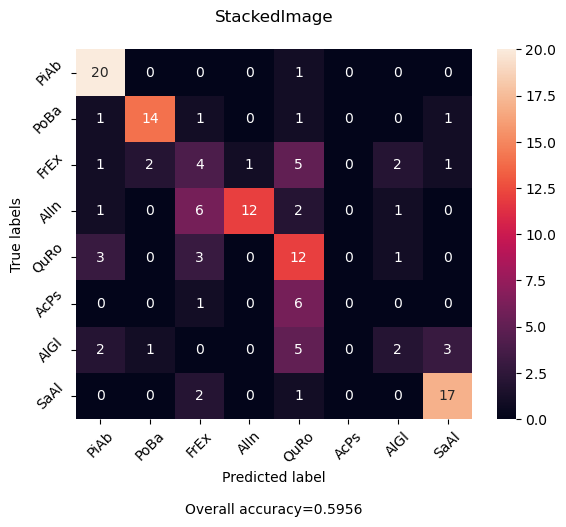

In [44]:
# You can change the colour to grey using this custom pallette
# # Create a custom colormap
#from matplotlib.colors import LinearSegmentedColormap
# grey = LinearSegmentedColormap.from_list(
#     name='grey_binary',
#     colors=['#363636', 'white']  # dark grey to white
# )

sns.heatmap(cf_matrix, annot=True, cmap="rocket")

# Get the current axis
ax = plt.gca()

# Set y-axis labels to horizontal
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('StackedImage', pad=20)

# Display accuracies
#plt.figtext(0.5, 0.05, f"Overall Accuracy: {overall_accuracy:.2f}", ha='center')
plt.xlabel('Predicted label\n\nOverall accuracy={:0.4f}'.format(overall_accuracy))
#plt.figtext(0.5, -0.01, f"Cohen's Kappa: {kappa:.2f}", ha='center')

# Show the plot
plt.show()